In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imdb_raw = pd.read_csv('imdb_labelled.csv', delimiter='\t', header=None)

amazon_raw = pd.read_csv('amazon_cells_labelled.csv', delimiter='\t', header=None)

yelp_raw = pd.read_csv('yelp_labelled.csv', delimiter='\t', header=None)

frames = [imdb_raw, amazon_raw, yelp_raw]

df = pd.concat(frames)

In [3]:
df.columns = ['review', 'sentiment']

In [4]:
df

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [5]:
keywords = ['average', 'bad', 'problem', 'avoid', 'waste', 'angry',
           'horrible', 'gross', 'mediocre', 'rude', 'disappointed', 'sad', 'not', 
           'lacks', 'terrible', 'worse', 'worst', 'sucked', 'awful']

for key in keywords:
    
    df[str(key)] = df.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    
# Basic feature creation involving the keyword method from the guided walkthrough

In [6]:
df['sentiment'] = (df['sentiment'] == 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 21 columns):
review          3000 non-null object
sentiment       3000 non-null bool
average         3000 non-null bool
bad             3000 non-null bool
problem         3000 non-null bool
avoid           3000 non-null bool
waste           3000 non-null bool
angry           3000 non-null bool
horrible        3000 non-null bool
gross           3000 non-null bool
mediocre        3000 non-null bool
rude            3000 non-null bool
disappointed    3000 non-null bool
sad             3000 non-null bool
not             3000 non-null bool
lacks           3000 non-null bool
terrible        3000 non-null bool
worse           3000 non-null bool
worst           3000 non-null bool
sucked          3000 non-null bool
awful           3000 non-null bool
dtypes: bool(20), object(1)
memory usage: 105.5+ KB


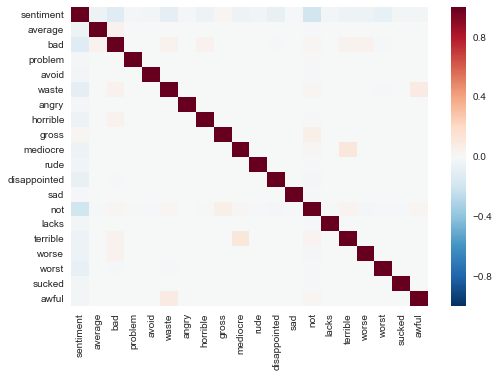

In [8]:
sns.heatmap(df.corr())

In [9]:
data = df[keywords]
target = df['sentiment']

In [11]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 3000 points: 1181


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print(clf.score(X_test, y_test))   

(1800, 19) (1800,)
(1200, 19) (1200,)
0.604166666667


In [20]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, data, target, cv=5)

print(scores)
print("Accuracy:{:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))

[ 0.58333333  0.595       0.605       0.60666667  0.61666667]
Accuracy:0.60 (+/- 0.02)
